# Big Data Mart Sales Prediction


Problem Statement : The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')


 Importing the dataset
Let's first import the train dataset for building our model and then will use the test dataset for getting prediction from the trained model.

Train Data


In [3]:
# Reading the csv file from dataset
train_df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
train_df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
train_df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Showing first five rows of the dataset.



# EDA

In [4]:
# Checking the dimension of the dataset
train_df.shape


(8523, 12)

The train dataset contains 8523 rows and 12 columns. Out of 12 columns, 11 are features and one is target variable i.e,"Item_Outlet_Sales".



In [5]:
# Checking the types of the dataset
train_df.dtypes


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

The columns contains three different types of data namely, object, int64 and float64 data types. The columns having object type data are categorical in nature which we need to process separately.



In [6]:
# To get good overview of the dataset
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


This gives the brief information about the dataset which includes indexing type, column type, no-null values and memory usage.



In [7]:
# Checking number of unique values in each column
train_df.nunique()


Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

These are the number of unique values present in each columns.



In [8]:
# Checking null values in the train dataset
train_df.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are so many missing values in the features Item_Weight and Outlet_Size. Here Item_Weight is a numerical data so we will use mean or median method to fill these null values and Outlet_Size is a categorical data so we will use mode method to fill the null values. We will treat this missing values in the later part.



<AxesSubplot:>

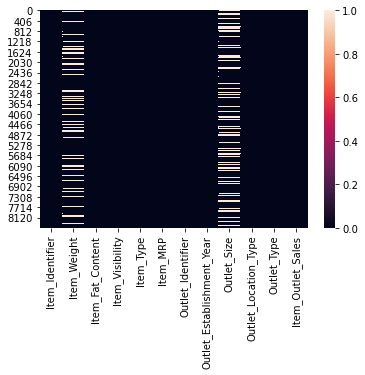

In [9]:
# Let's visualize the null values clearly
sns.heatmap(train_df.isnull())


Here we can clearly see that the presence of white lines indicates the missing values in the columns.



In [10]:
# Checking how many columns are there in the dataset
train_df.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

These are the columns present in the given train dataset.



In [11]:
# Checking the uniqueness of the label
train_df['Item_Outlet_Sales'].unique()


array([3735.138 ,  443.4228, 2097.27  , ..., 7182.6504, 3608.636 ,
       2778.3834])

In [12]:
# Checking count of outlet sales 
train_df["Item_Outlet_Sales"].value_counts()


958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1278.3360    14
             ..
3167.8764     1
2226.4352     1
1684.4740     1
1574.6170     1
6692.6216     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [13]:
# Checking wheather the dataset contains any space
train_df.loc[train_df['Item_Outlet_Sales']==" "]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


So it is clear that there are no space present in the dataset. Let's move further.



# Description of dataset


In [14]:
# Statistical summary of dataset
train_df.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present.

This describe method displaying only the numerical columns that are available in the dataset. This statistical description gives the count, mean, standard deviation, minimum quantile, 25% quantile, 50% quantile, 75% quantile range and maximum quantile range of the items
Here we can observe the count of the feature Item_Weight has 7060 which means there are missing values present. The average weight of the product is 12, maximum weight is 21 and minimum is 4 which means the data looks normal in this case.
In summarising the data we can also see that the dataset seems to be having more outliers as well as skewness in the data. The column Item_MRP and Outlet_Establishment_Year have huge outliers from the max of 266 and 2009 respectively. We will remove this skewness and outliers before building the models. These difference can also be seen in the Item_Outlet_Sales, since it is target variable so no need to worry about it as we are going to predict it.


# Data Visualization


# Univariate Analysis

# Plotting categorical columns


In [15]:
# Checking value count of Item_Fat_Content
print(train_df["Item_Fat_Content"].value_counts())


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


This is a categorical data in which LF and Low fat classes belongs to Low Fat and reg belongs to Regular. So I am going to replace these classes with their respective categories.



In [16]:
train_df["Item_Fat_Content"]=train_df["Item_Fat_Content"].replace('LF','Low Fat')
train_df["Item_Fat_Content"]=train_df["Item_Fat_Content"].replace('low fat','Low Fat')
train_df["Item_Fat_Content"]=train_df["Item_Fat_Content"].replace('reg','Regular')


Now I have replaced LF,low fat by Low Fat and reg by Regular.



Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Text(0.5, 1.0, 'Item_Fat_Content')

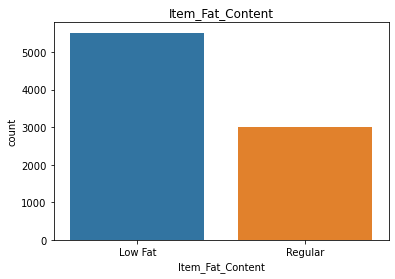

In [17]:
# Checking value count of Item_Fat_Content
print(train_df["Item_Fat_Content"].value_counts())

#Visualize the count of Item_Fat_Content
sns.countplot(train_df["Item_Fat_Content"])
plt.title("Item_Fat_Content")


From this visualization we can observe that most of the products are Low fat content and very few are regular. This means if we produce low fat items then Sales also increases.



In [18]:
# Let's check the value count of Item_Type
train_df["Item_Type"].value_counts()


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Here Fruits and Vegetables have high value counts followed by Snacks Foods, Household etc.



Text(0.5, 1.0, 'Item_Type')

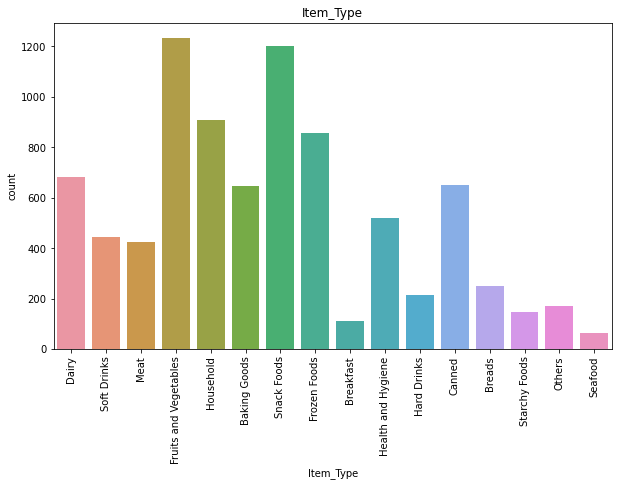

In [19]:
#Visualizing the count of Item_Type
plt.figure(figsize=(10,6))
sns.countplot(train_df["Item_Type"])
plt.xticks(rotation=90)
plt.title('Item_Type')


Here we can easily observe that the Fruits and Vegetables have high count followed by Snack Foods, Household and Frozen Foods. Most of the people comes to buy these products.



Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


Text(0.5, 1.0, 'Outlet_Size')

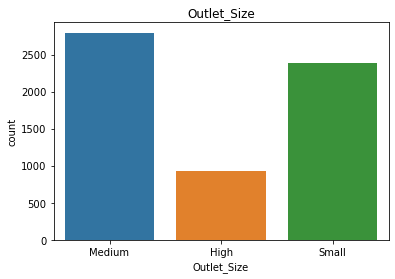

In [20]:
#Visualize the count of Outlet_Size
print(train_df["Outlet_Size"].value_counts())
sns.countplot(train_df["Outlet_Size"])
plt.title('Outlet_Size')


This is the size of the store in terms of ground area covered. Here we have 3 outlet_sizes in which the count of Medium outlet_size is more followed by Small outlet_size and High outlet_size has very less count of around 900.



Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


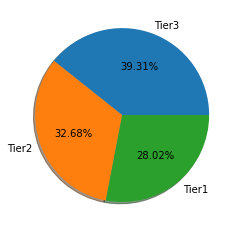

In [21]:
#Visualize the count of Outlet_Location_Type
print(train_df["Outlet_Location_Type"].value_counts())
labels='Tier3','Tier2','Tier1'
fig, ax = plt.subplots()
ax.pie(train_df['Outlet_Location_Type'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()


From this pie chart we can observe there are 3 types of cities namely, Tier1, Tier2 and Tier3 in which the stores are located. The city Tier3 contains more stores compare to other two and the city Tier1 has less outlets.



Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


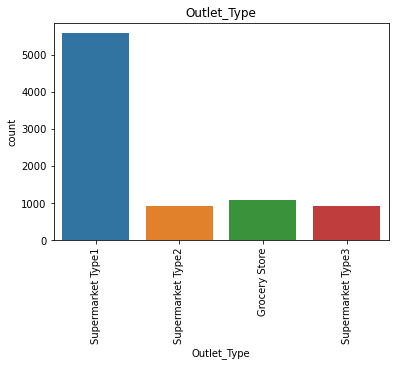

In [22]:
# Checking the value count of Outlet_Type
print(train_df["Outlet_Type"].value_counts())

#Visualize the count of Outlet_Type
sns.countplot(train_df["Outlet_Type"])
plt.title('Outlet_Type')
plt.xticks(rotation=90)
plt.show()


Here the Supermarket Type1 has high count say 5500 and is so much biased. This is because this outlet type may contain some different styles compare to others.



# Distribution of skewness


# Plotting Numerical columns


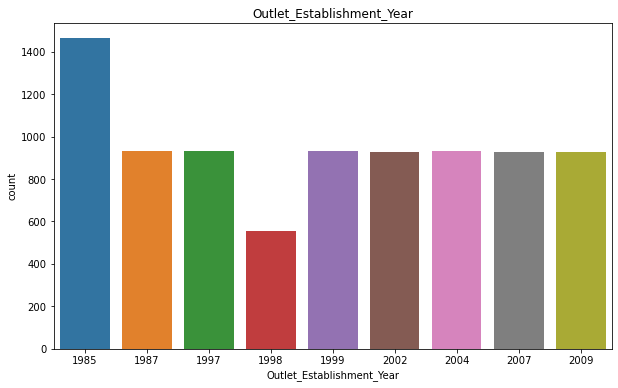

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Establishment_Year',data=train_df)
plt.title('Outlet_Establishment_Year')
plt.show()


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

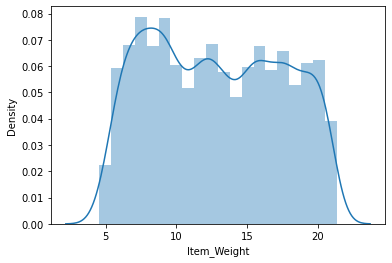

In [24]:
sns.distplot(train_df["Item_Weight"])


The data is almost normally distributed and we can observe most of the Item_Weight is between 5 to 22. There is no skewness.



<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

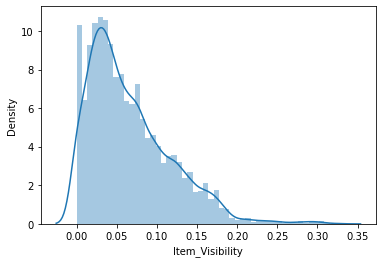

In [25]:
sns.distplot(train_df["Item_Visibility"])


Here the data is not normally distributed and also has left skewness. This gives the percentage of all the products in a store allocated to the particular product. Most of the items have no visibility and some of them have visibility 0.02 to 0.10.



<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

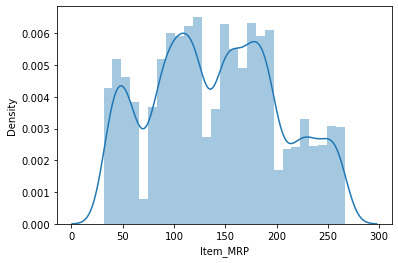

In [26]:
sns.distplot(train_df["Item_MRP"])


The data is not normally distributed here and there is no skewness. Here the price of the item is almost between 30 to 270, we can also observe there are four types of bills. The price of the item is more between 100 to 180.



<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

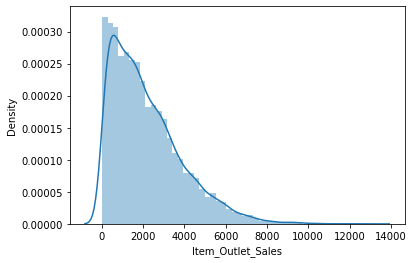

In [27]:
sns.distplot(train_df["Item_Outlet_Sales"])


The data is not normally distributed and is also left skewed. The sales of item outlet ranges from 0 to 14000. Since it is our target variable I am not going to remove the skewness from it.



<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

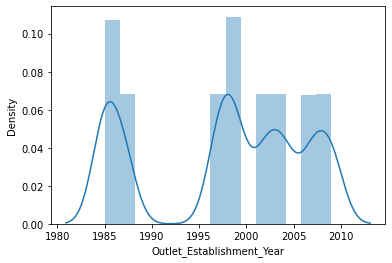

In [28]:
sns.distplot(train_df["Outlet_Establishment_Year"])


The data is not normally distributed and has no skewness. Here most of the stores established in 1985 and 2000.

From the above distplot we can observe that most of the columns are not normally distributed and the column Item_Visibility contains skewness. Will remove this skewness in the later part.



# Bivariate Analysis


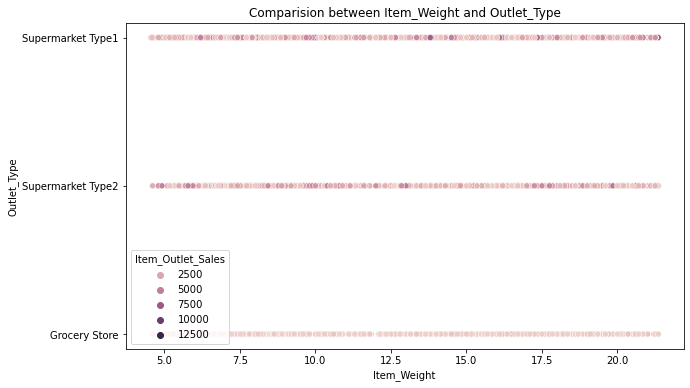

In [29]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparision between Item_Weight and Outlet_Type')
sns.scatterplot(x='Item_Weight',y='Outlet_Type', hue="Item_Outlet_Sales", data=train_df);


This gives the comaprision between the item weight and outelet type. Here we can see the Grocery store has no much sales but supermarket type1 has more sales followed by supermarket type2.



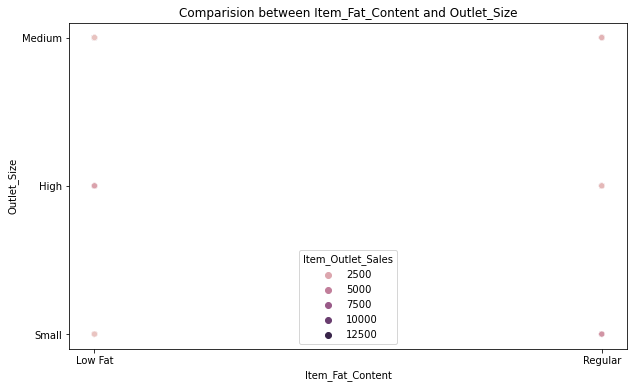

In [30]:
plt.figure(figsize=[10,6])
sns.scatterplot(x=train_df['Item_Fat_Content'],y=train_df['Outlet_Size'],data=train_df, hue=train_df["Item_Outlet_Sales"])
plt.title('Comparision between Item_Fat_Content and Outlet_Size')
plt.show()


Here the low fat items with High outlet sizes have nearly 5000 sales compare to others.



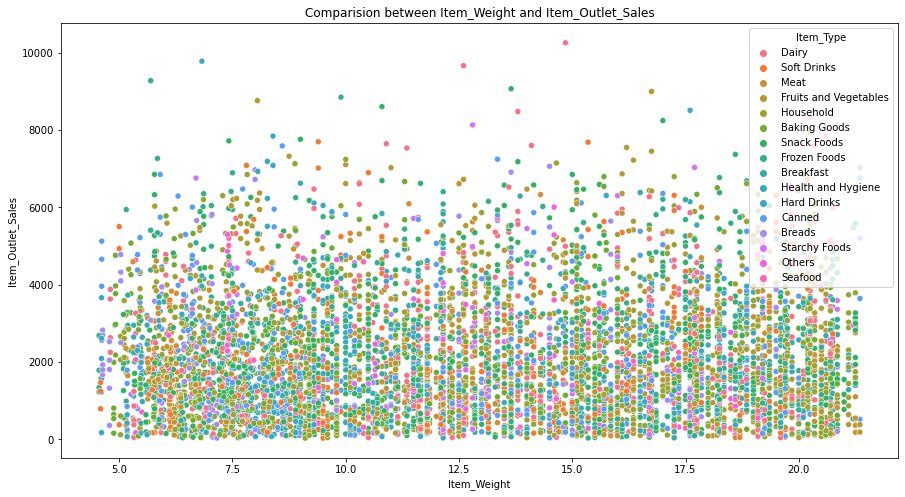

In [31]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', hue='Item_Type', data=train_df)
plt.title('Comparision between Item_Weight and Item_Outlet_Sales')
plt.show()


The data is scattered and there is no linear relationship between Item_Weight and Item_Outlet_Sales. Most of the Item_Types having Item_Weight between 5 to 25 have the sales nearly 5000. We can also notice some outliers here and there is very less correlation between these columns.



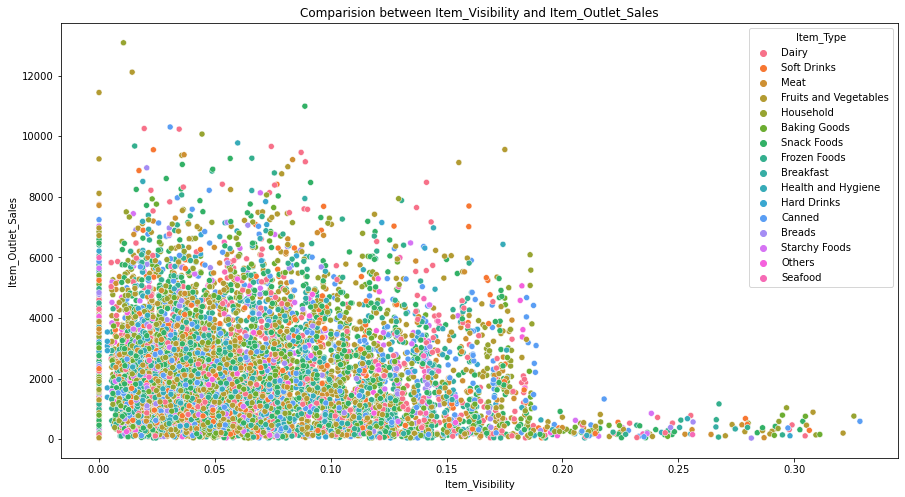

In [32]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', hue='Item_Type',  data=train_df)
plt.title('Comparision between Item_Visibility and Item_Outlet_Sales')
plt.show()


Most of the Items have very low visibility. The items between 0 to 0.05 have high outlet sales of 10000 though they have low visibility. So higher the visibility of item, lower the sales of the product. And some of them have high visibility but low sales. There are some outliers present in this case as well.



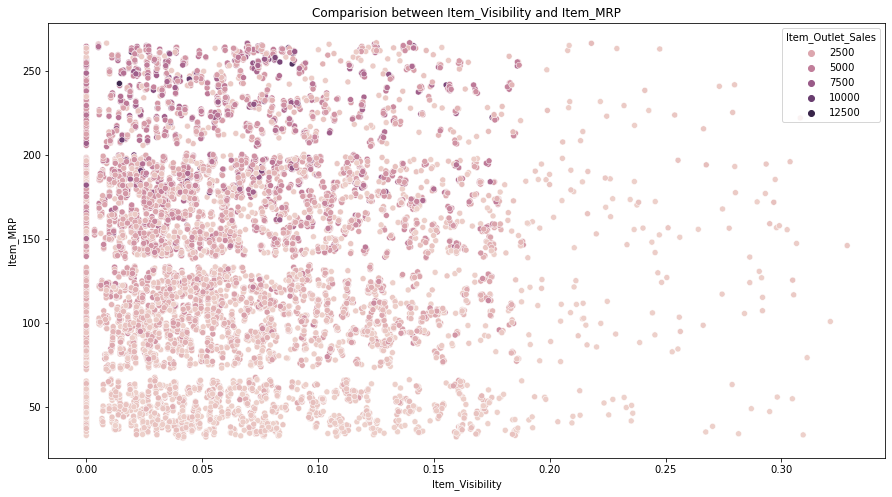

In [33]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Item_Visibility', y='Item_MRP', hue='Item_Outlet_Sales', data=train_df)
plt.title('Comparision between Item_Visibility and Item_MRP')
plt.show()


The items having low visibility have maximum price which means high sales. As the visibility increses the price decreases.



<Figure size 1080x576 with 0 Axes>

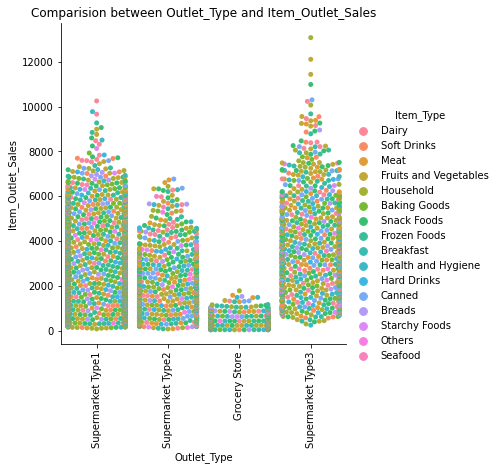

In [34]:
plt.figure(figsize=(15,8))
sns.catplot(x='Outlet_Type', y='Item_Outlet_Sales', hue='Item_Type',  data=train_df, kind="swarm")
plt.title('Comparision between Outlet_Type and Item_Outlet_Sales')
plt.xticks(rotation=90)
plt.show()


The Supermarket Type3 is the one having the high Outlet sales on Item_Type followed by Supermarket Type1.



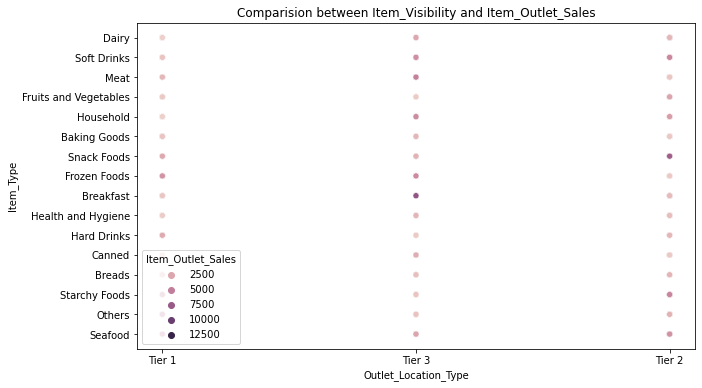

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Outlet_Location_Type', y='Item_Type', hue='Item_Outlet_Sales',  data=train_df)
plt.title('Comparision between Item_Visibility and Item_Outlet_Sales')
plt.show()


The item type Breakfast and Snack foods have highest sales in the city Tier3 and Tier2 respectively.



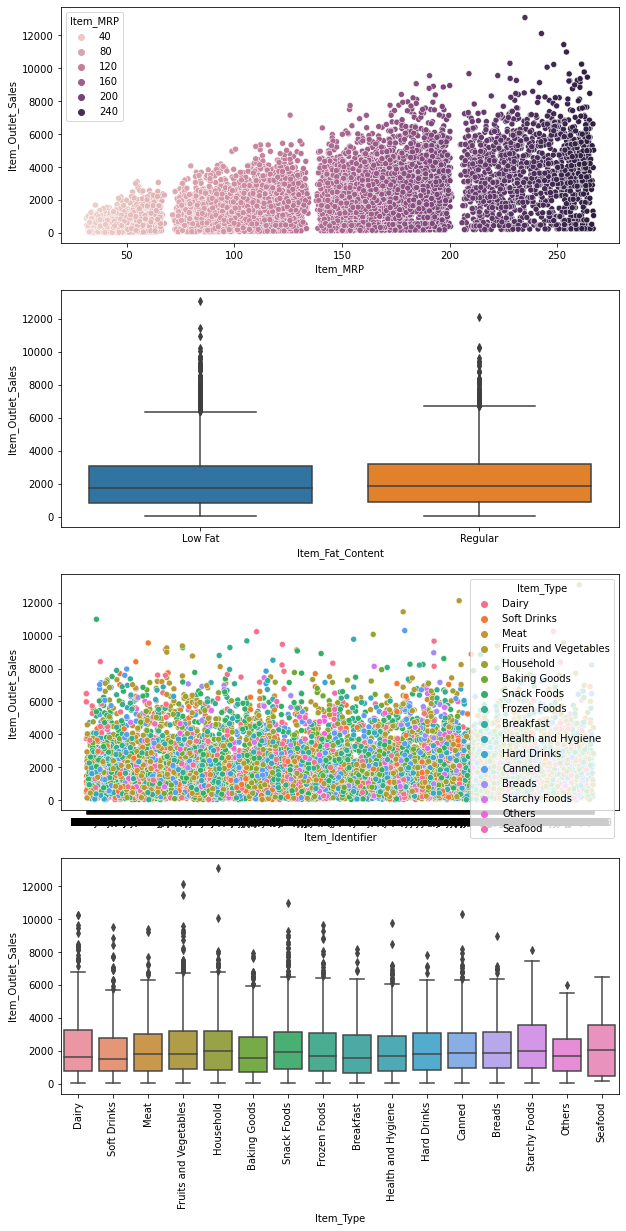

In [36]:
# Let's visualize all the features relationship with target variable
fig,axes=plt.subplots(4,1,figsize=(10,20))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue="Item_MRP",ax=axes[0],data=train_df)
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',ax=axes[1],data=train_df)
sns.scatterplot(x='Item_Identifier',y='Item_Outlet_Sales',hue="Item_Type",ax=axes[2],data=train_df)
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',ax=axes[3],data=train_df)
plt.xticks(rotation=90)
plt.show()


From the above plots we can observe the following things

As the price increases the item sales increases this means both are correlated with each other.
Low Fat content items have high sales compare to Regular.
Item_ Identifier has less linear relationship with the target variable.
Fruits and vegetables have high sales followed by Snack Foods and Household.


<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

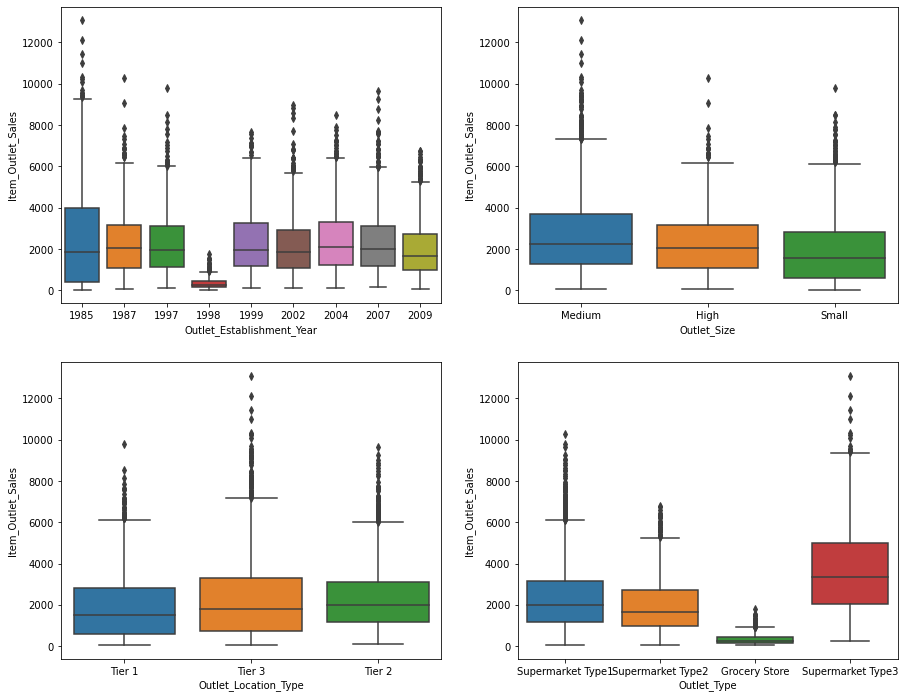

In [4]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axes[0,0],data=train_df)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[0,1],data=train_df)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[1,0],data=train_df)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[1,1],data=train_df)


From the plots we can observe

Most of the outlets established in the year 1985 and they have high sales.
The Medium outlet size has high sales compared to other two.
The outlet located in the city Tier3 has high sales.
Supermarket Type3 has high sales followed by Type1.


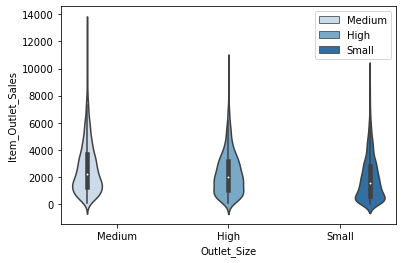

In [5]:
sns.violinplot(x=train_df["Outlet_Size"],y=train_df["Item_Outlet_Sales"],hue = train_df["Outlet_Size"],palette = "Blues")
plt.legend()
plt.show()


The Medium outlet size has high sales compare to other two stores size.



# Multivariate Analysis


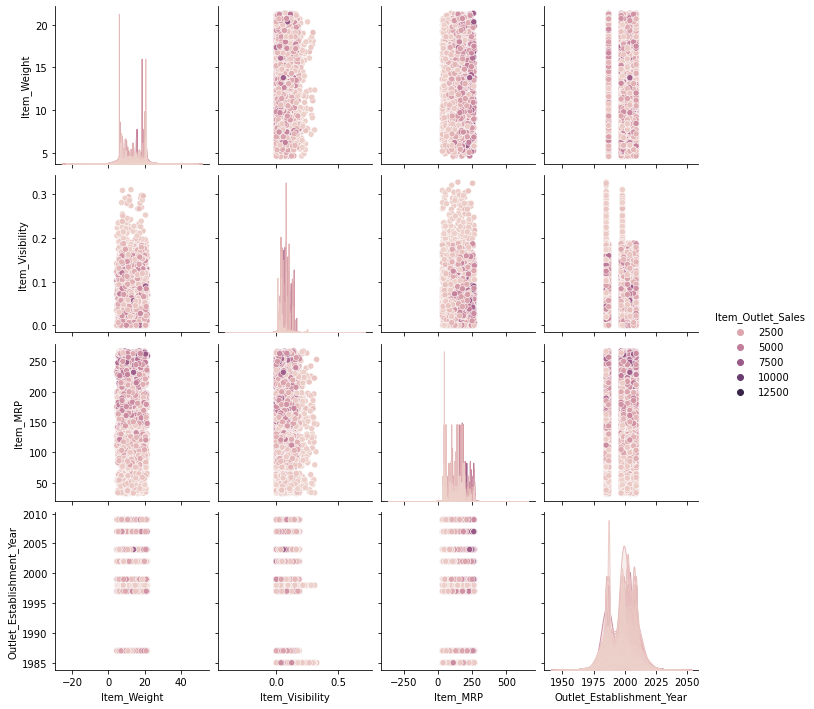

In [6]:
# Checking the pairwise relation in the dataset.
sns.pairplot(train_df,hue="Item_Outlet_Sales")


This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable 'Item_Outlet_Sales'.

From this pairplot we can observe that the correlation exists between two variables and on the diagonal we can see distribution plotting. Here the columns wich are displayed are all numerical other than these columns all are categorical.



# Correlation between the target variable and independent variables using HEAT map


In [7]:
cor = train_df.corr()
cor


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


This gives the correlation between the denpendent and independent variables



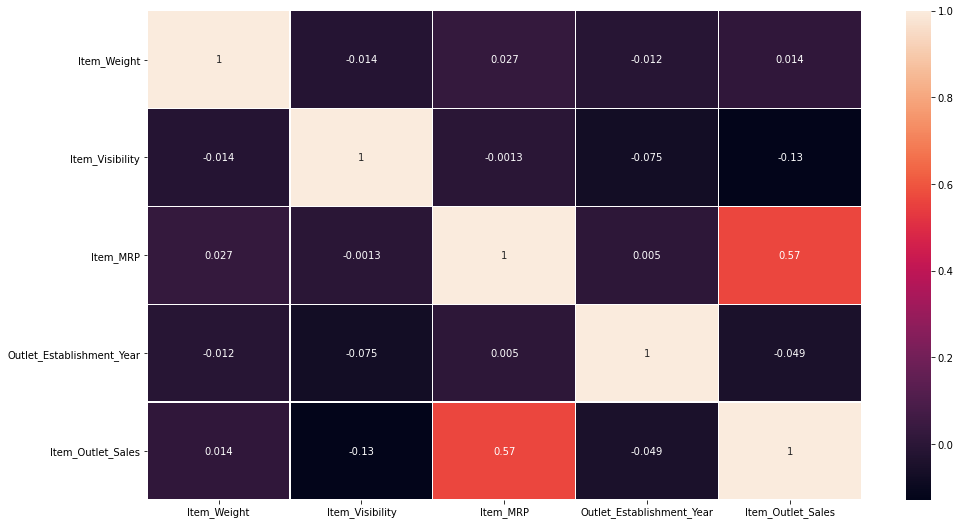

In [8]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(train_df.corr(),linewidths=.1, annot = True)
plt.yticks(rotation=0);


This heat map contains both positive and negative correlation.

The feature Item_MRP is highly positively correlated with target variable Item_Outlet_Sales.
The feature Item_Weight has very low positive correlation with target variable.
The feature Item_Visibility and Outlet_Establishment_Year have very low negative correlation with the target variable.
We can also observe there is very less correlation between the features.


In [10]:
cor['Item_Outlet_Sales'].sort_values(ascending=False)


Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

Here we can see that Item_MRP and Item_Weight have positive correlation with target variable and Outlet_Establishment_Year and Item_Visibility have negative correlation with the target.



# Visualizing the correlation between label and features using bar plot


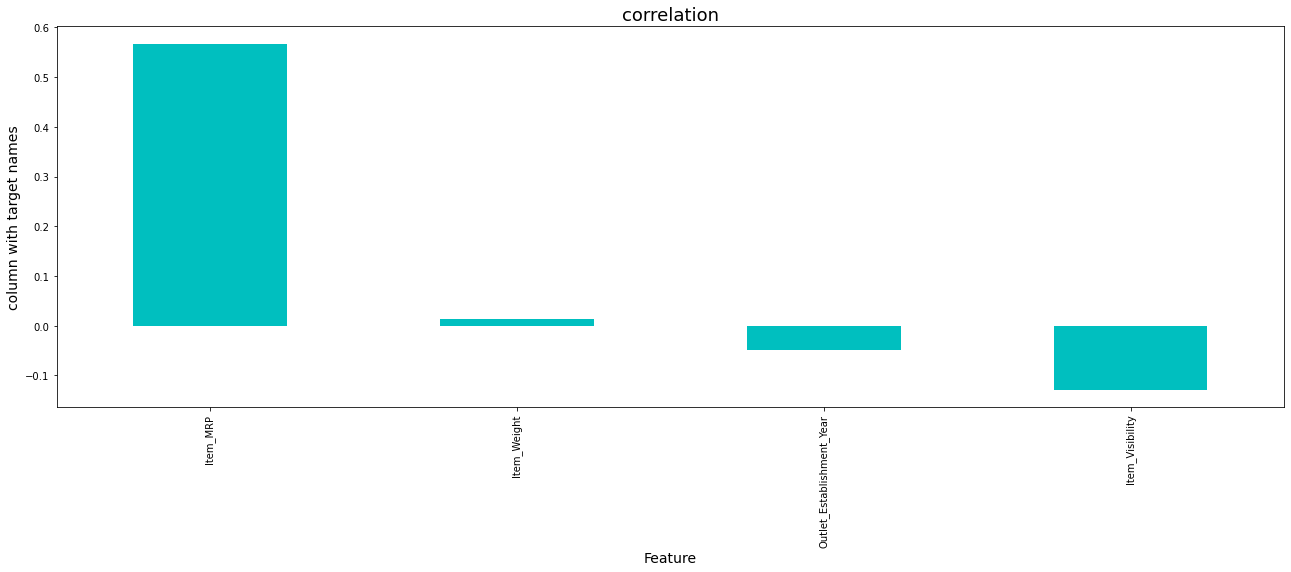

In [11]:
plt.figure(figsize=(22,7))
train_df.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()


This is the bar plot to visualize the correlation between the target and features. Here Item_Weight is very less correlated so we can drop this column if necessary.



# Data cleaning


# Treating Missing Values using imputation techniques


In [12]:
# Checking the missing values
train_df.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The features Item_Weight and Outlet_Size have missing values.

Since Item_Weight has a numerical data and has no outliers then we can fill the null values by using mean method.

In [13]:
train_df['Item_Weight'].mean()  # we will rwplace the null values using this mean


12.857645184136183

In [14]:
# Filling missing values in Item_Weight
train_df["Item_Weight"] = train_df["Item_Weight"].fillna(train_df["Item_Weight"].mean())


Outlet_Size is a categorical column and the mode of Outlet_Size is Medium since it has high value count, so we can fill the NAN values using mode method.


In [15]:
# Filling missing values in Outlet_Size
train_df["Outlet_Size"] = train_df["Outlet_Size"].fillna(train_df["Outlet_Size"].mode()[0])


In [16]:
# Let's check the missing value after filling it up
train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

So we have filled the missing values present in the columns. Now our data is cleaned. Let's visualize it by heat map.



<AxesSubplot:>

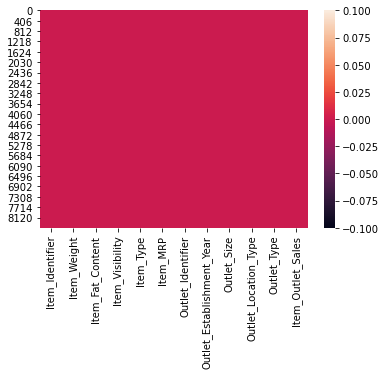

In [17]:
# Visualizing the missing value after treating it using heat map.
sns.heatmap(train_df.isnull())

# Identifying the outliers


<AxesSubplot:>

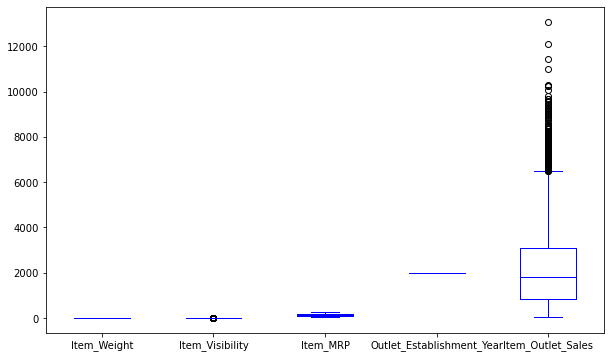

In [18]:
train_df.plot(kind="box", figsize=(10,6), color="b",vert=True)


The columns Item_Visibility and Item_Outlet_Sales have outliers. Since Item_Outlet_Sales is our label so no need to remove outliers. Ler's remove outliers in Item_Visibility.



<AxesSubplot:xlabel='Item_Visibility'>

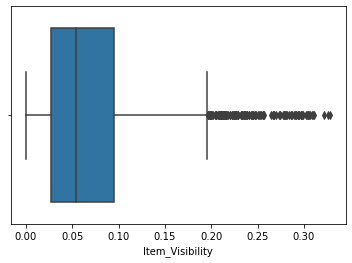

In [19]:
sns.boxplot(train_df["Item_Visibility"])


The outliers present in the maximum quantile of the box. Let's remove this outlier using Zscore or IQR methods.



# Removing outliers


# 1.Zscore method


In [20]:
train_df.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [21]:
# Continuous feature having outliers 
variable = train_df[['Item_Visibility']]

In [22]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(variable))

z


array([[0.97073217],
       [0.90811123],
       [0.95691733],
       ...,
       [0.59978449],
       [1.53287976],
       [0.41193591]])

Now the outliers have been removed.



In [23]:
# Creating new dataframe
new_df = train_df[(z<3).all(axis=1)]
new_df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


This is the new dataframe after removing the outliers.



In [24]:
train_df.shape


(8523, 12)

The original dataset contains 8523 rows and 12 columns.



In [25]:
new_df.shape


(8428, 12)

The new dataframe contains 8428 rows and 12 columns.



In [26]:
# Let's check the dataloss
data_loss = (8523-8428)/8523*100
data_loss


1.1146309984747156

Here I am not losing more data so I am removing outliers.

Let's remove the outliers and check data loss using IQR method.



# 2. IQR (Inter Quantile Range) method


In [27]:
# 1st quantile
Q1=variable.quantile(0.25)

# 3rd quantile
Q3=variable.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=train_df[~((train_df < (Q1 - 1.5 * IQR)) |(train_df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [28]:
train_df.shape


(8523, 12)

In [29]:
df1.shape


(8379, 12)

The new dataframe using IQR method has 8379 rows and 12 columns.



In [31]:
# Let's check the dataloss
data_loss = (8523-8379)/8523*100
data_loss


1.689545934530095

Here also I am not losing more data. But compare to Zscore, the loss of data in IQR is bit more, so let me consider Zscore mwthod.



# Checking for skewness


In [32]:
# Checking the skewness
new_df.skew()

Item_Weight                  0.089907
Item_Visibility              0.795956
Item_MRP                     0.128945
Outlet_Establishment_Year   -0.409186
Item_Outlet_Sales            1.173070
dtype: float64

We have skewness only in Item_Visibility, let's remove the skewness.



# Removing Skewness using yeo-johnson method


In [33]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''


"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [34]:
feature = ["Item_Visibility"]
new_df[feature] = scaler.fit_transform(new_df[feature].values)
new_df[feature].head()


,Item_Visibility
0,-1.142270
1,-1.032913
2,-1.117874
3,-1.734798
4,-1.734798


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

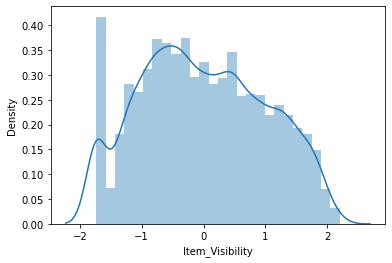

In [35]:
# After removing let's check how the data has been distributed in the column
sns.distplot(new_df["Item_Visibility"])


The data is almost normally distributed and the skewness also removed.



In [36]:
# Now let's check the skewness
new_df.skew()


Item_Weight                  0.089907
Item_Visibility              0.115444
Item_MRP                     0.128945
Outlet_Establishment_Year   -0.409186
Item_Outlet_Sales            1.173070
dtype: float64

We can see the skewness has been got removed.



# Encoding the data using Label Encoding


In [37]:
#checking for the categorical variables
cat_col=[]
for x in train_df.dtypes.index:
    if train_df.dtypes[x]=='object':
        cat_col.append(x)
print(cat_col)


['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


These are the columns having object data type which we need to encode now.



In [38]:
cols = ["Item_Identifier", "Item_Fat_Content", "Item_Type", "Outlet_Identifier", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]


In [39]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[cols]= new_df[cols].apply(LE.fit_transform)

In [40]:
new_df[cols].head()


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,1,4,9,1,0,1
1,8,2,14,3,1,2,2
2,662,1,10,9,1,0,1
3,1121,2,6,0,1,2,0
4,1297,1,9,1,0,2,1


Now our categorical data has been converted into the numerical data. Here we can see the unique value counts of all the encoded columns.



In [41]:
# Dataset after cleaning and encoding
new_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,-1.142270,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,-1.032913,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,-1.117874,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,-1.734798,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,-1.734798,9,53.8614,1,1987,0,2,1,994.7052


# Preprocessing the Data


Separating the independent and target variables into x and y


In [42]:
x = new_df.drop("Item_Outlet_Sales", axis=1)
y = new_df["Item_Outlet_Sales"]


Here we have separated the target variable and independent variable.



In [43]:
x.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,1,-1.142270,4,249.8092,9,1999,1,0,1
1,8,5.92,2,-1.032913,14,48.2692,3,2009,1,2,2
2,662,17.50,1,-1.117874,10,141.6180,9,1999,1,0,1
3,1121,19.20,2,-1.734798,6,182.0950,0,1998,1,2,0
4,1297,8.93,1,-1.734798,9,53.8614,1,1987,0,2,1


Dataset containg all independent variables.



In [44]:
y.value_counts()


958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1278.3360    14
             ..
2668.5264     1
3365.6190     1
8508.9240     1
3751.7830     1
158.4604      1
Name: Item_Outlet_Sales, Length: 3475, dtype: int64

# Scaling the data using MinMaxScaler


In [45]:
from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)
x


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.100128,0.282525,0.25,0.150584,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333
1,0.005135,0.081274,0.50,0.178376,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667
2,0.424904,0.770765,0.25,0.156784,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333
3,0.719512,0.871986,0.50,0.000000,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000
4,0.832478,0.260494,0.25,0.000000,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
8423,0.237484,0.137541,0.25,0.449370,0.866667,0.777729,0.111111,0.083333,0.0,1.0,0.333333
8424,0.575738,0.227746,0.50,0.386845,0.000000,0.326263,0.777778,0.708333,0.5,0.5,0.333333
8425,0.870988,0.359929,0.25,0.304215,0.533333,0.228492,0.666667,0.791667,1.0,0.5,0.333333
8426,0.437099,0.158083,0.50,0.831823,0.866667,0.304939,0.333333,1.000000,0.5,1.0,0.666667


Now the features are in scale.



# Modeling


# Finding the best random state


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [47]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)


Maximum r2 score is  0.53799634656942  on Random_state  115


I am getting the maximum r2 score as 53% on the random state 115.



In [48]:
# Creating new train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)


# Regression Algorithms


In [49]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics


# Linear Regression


In [50]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predLR))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predLR))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))

R2_score: 0.53799634656942
MAE: 892.0064713640647
MSE: 1414681.4501135307
RMSE: 1189.4038212960015


The R2 score value for Linear Regression model is 53.81%



# Random Forest Regressor


In [51]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predRFR))
print('MAE:',metrics.mean_absolute_error(y_test, predRFR))
print('MSE:',metrics.mean_squared_error(y_test, predRFR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))


R2_Score: 0.5885761161927536
MAE: 791.5443806777383
MSE: 1259803.320241994
RMSE: 1122.4096044858106


The R2 score value for Random Forest Regressor model is 58.70%



# AdaBoost Regressor


In [65]:
# Checking R2 score for AdaBoost Regressor
ABR=AdaBoostRegressor()
ABR.fit(x_train,y_train)

# prediction
predABR=ABR.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predABR))
print('MAE:',metrics.mean_absolute_error(y_test, predABR))
print('MSE:',metrics.mean_squared_error(y_test, predABR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predABR)))


R2_Score: 0.4667812096446664
MAE: 1026.2645774980754
MSE: 1632746.2477112454
RMSE: 1277.789594460389


The R2 score for AdaBoost regressor model is 46.67%.



# Stochastic Gradient Descent Regressor


In [53]:
# Checking R2 score for Stochastic Gradient Descent Regressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)

# prediction
predSGD=SGD.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predSGD))
print('MAE:',metrics.mean_absolute_error(y_test, predSGD))
print('MSE:',metrics.mean_squared_error(y_test, predSGD))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predSGD)))


R2_Score: 0.5360004855302878
MAE: 892.1843485745952
MSE: 1420792.8900731478
RMSE: 1191.9701716373393


The R2 score for Gradient Descent Regressor model is 53.53%.



# GradientBoosting Regressor


In [54]:
# Checking R2 score for Stochastic GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predGB))
print('MAE:',metrics.mean_absolute_error(y_test, predGB))
print('MSE:',metrics.mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predGB)))


R2_Score: 0.6126891776909368
MAE: 765.1364116670912
MSE: 1185967.7551904456
RMSE: 1089.0214668180079


The R2 score for GradientBoosting Regressor model is 61.26%.



# KNN Regressor


In [55]:
# Checking R2 score for Stochastic KNN Regressor
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predknn))
print('MAE:',metrics.mean_absolute_error(y_test, predknn))
print('MSE:',metrics.mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predknn)))


R2_Score: 0.5295073508900665
MAE: 850.7225933570581
MSE: 1440675.2374537424
RMSE: 1200.2813159646128


The R2 score for KNN Regressor model is 53%.



# Checking the cross validation score


In [56]:
from sklearn.model_selection import cross_val_score


In [57]:
# Checking cv score for Linear Regression
print(cross_val_score(LR,x,y,cv=5).mean())


0.5044873137750909


In [58]:
# Checking cv score for Random Forest Regression
print(cross_val_score(RFR,x,y,cv=5).mean())


0.5441842370270116


In [66]:
# Checking cv score for AdaBoost Regression
print(cross_val_score(ABR,x,y,cv=5).mean())


0.4655998709401377


In [60]:
# Checking cv score for Stochastic Gradient Descent Regressor
print(cross_val_score(SGD,x,y,cv=5).mean())


0.5040930891680111


In [61]:
# Checking cv score for GradientBoosting Regressor
print(cross_val_score(GB,x,y,cv=5).mean())


0.5875421715280712


In [62]:
# Checking cv score for KNN
print(cross_val_score(knn,x,y,cv=5).mean())


0.4969014409000042


These are the cross validation score for the models that I have used.

From the above observation, the difference between R2 score and the cross validation score we conclude that AdaBoostRegressor is our best fitting model



# Hyper parameter tuning


In [67]:
from sklearn.model_selection import GridSearchCV


In [68]:
# Adaboost Regressor
parameters = {'n_estimators':[50,200],
              'random_state':[2,3,4,5],
              'learning_rate':[0.01,0.022,0.05],
              'loss':['linear','square','exponential']}


In [69]:
GCV=GridSearchCV(AdaBoostRegressor(),parameters,cv=5)


In [119]:
GCV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.022, 0.05],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 200],
                         'random_state': [2, 3, 4, 5]})

Tuning the model using GridSearchCV.



In [120]:
GCV.best_params_


{'learning_rate': 0.022,
 'loss': 'linear',
 'n_estimators': 200,
 'random_state': 5}

This gives the best parameter value.



In [121]:
Final_mod = AdaBoostRegressor(learning_rate=0.022, loss='linear', n_estimators=200, random_state=5)
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))
print('R2_Score:',r2_score(y_test,pred)*100)


RMSE value: 1122.4096044858106
R2_Score: 58.652914290216486


After tuning R2 score of our model has been increased and has 58.65%.



# Saving the model


In [109]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_mod,"Big_Data_Mart_Sales.pkl")


['Big_Data_Mart_Sales.pkl']

Let's use test dataset for getting prediction from the trained model



# Test Data


In [71]:
# Reading the csv file from dataset
test_df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")
test_df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


This dataset has no target variable, we need to use our past data(trained data) to get the sales prediction.



In [72]:
# Checking the dimension of the dataset
test_df.shape


(5681, 11)

The test dataset contains 5681rows and 11 columns.



In [73]:
# Checking the types of the dataset
test_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

Here Item_Weight, Item_Visibility, Item_MRP are float data types, Outlet_Establishment_Year is integer type dataset and remaining all the features are object type.



In [75]:
# Checking number of unique values in all the columns 
test_df.nunique()


Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

These are the number of unique values present in each columns.



In [77]:
# Checking count of null values from the dataset.
test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

We can notice there are missing values in the columns Item_Weight and Outlet_Size. Will treat them later.



<AxesSubplot:>

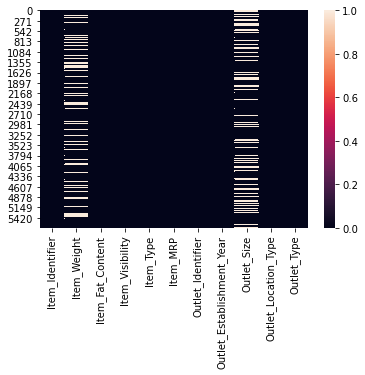

In [78]:
# Let's visualize the null values clearly
sns.heatmap(test_df.isnull())

Here we can clearly see that the presence of white lines indicates the missing values in the columns.



In [79]:
# Checking how many columns are there in the dataset
test_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

# Description of test Dataset


In [80]:
# Statistical summary of dataset
test_df.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


This gives some statistical information about our test dataset. The count of item weight is 4705 all the other columns have same counts, which means it has null values.



In [81]:
# Checking value count of Item_Fat_Content
print(test_df["Item_Fat_Content"].value_counts())


Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64


This is a categorical data in which LF and Low fat classes belongs to Low Fat and reg belongs to Regular. So I am going to replace these classes with their respective categories.



In [82]:
test_df["Item_Fat_Content"]=test_df["Item_Fat_Content"].replace('LF','Low Fat')
test_df["Item_Fat_Content"]=test_df["Item_Fat_Content"].replace('low fat','Low Fat')
test_df["Item_Fat_Content"]=test_df["Item_Fat_Content"].replace('reg','Regular')


Now I have replaced LF,low fat by Low Fat and reg by Regular.



In [83]:
# Checking value count of Item_Fat_Content
print(test_df["Item_Fat_Content"].value_counts())


Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64


Now the item fat content has been reduced to 2 categories.



# Data Cleaning


# Treating Missing values using imputation techniques


In [84]:
# Checking the missing values
test_df.isnull().sum()


Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

The feature Item_Size is numerical and we will use mean methhod to fill the null values.
The feature Outlet_Size is a categorical data and the mode of Outlet_Size is Medium so will use mode method to treat the null values.


In [85]:
# Filling missing values in Item_Weight
test_df["Item_Weight"] = test_df["Item_Weight"].fillna(test_df["Item_Weight"].mean())


In [86]:
# Filling missing values in Outlet_Size
test_df["Outlet_Size"] = test_df["Outlet_Size"].fillna(test_df["Outlet_Size"].mode()[0])


In [87]:
# Let's check the missing value after filling it up
test_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

We have filled the null values.



<AxesSubplot:>

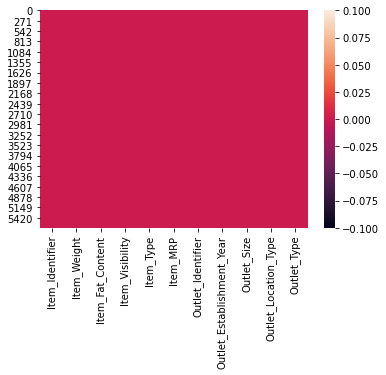

In [88]:
# Visualizing the missing value after treating it using heat map.
sns.heatmap(test_df.isnull())


# Identifying the outliers


<AxesSubplot:>

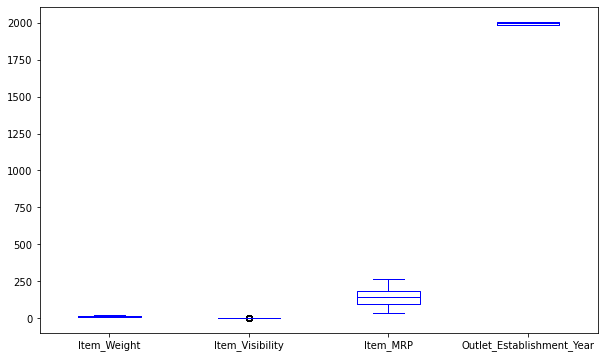

In [89]:
test_df.plot(kind="box", figsize=(10,6), color="b",vert=True)


The column Item_Visibility has outliers, let's remove it.



# Removing the outliers


# 1. Zscore method


In [90]:
test_df.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [91]:
from scipy.stats import zscore
z=np.abs(zscore(test_df[["Item_Visibility"]]))
new_dff=test_df[(z<3).all(axis=1)]
new_dff


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


We have removed the outliers using Zscore method.



In [92]:
# Dimension of old dataset
test_df.shape


(5681, 11)

In [93]:
# Dimension of new dataset
new_dff.shape


(5600, 11)

The new dataset has 5600 rows and 11 columns.



In [94]:
# Let's check the dataloss
data_loss = (5681-5600)/5681*100
data_loss


1.425805315965499

The dataloss using Zscore is 1.42 which is very less so I am removing outliers.



# Removing skewness using yeo-johnson method


In [95]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''


"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [96]:
new_dff[['Item_Visibility']] = scaler.fit_transform(new_dff[['Item_Visibility']].values)


In [97]:
# Now let's check the skewness
new_dff.skew()


Item_Weight                  0.140901
Item_Visibility              0.105676
Item_MRP                     0.133061
Outlet_Establishment_Year   -0.411451
dtype: float64

Now we have removed the skewness.



# Label Encoding


In [98]:
#checking for the categorical variables
cat_cols=[]
for x in test_df.dtypes.index:
    if test_df.dtypes[x]=='object':
        cat_cols.append(x)
print(cat_cols)


['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


These are the categorical columns in the test dataset.



In [99]:
from sklearn.preprocessing import LabelEncoder
columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
LE=LabelEncoder()
new_dff[columns]= new_dff[columns].apply(LE.fit_transform)


In [100]:
new_dff[columns].head()


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1102,0,13,9,1,0,1
1,1066,1,4,2,1,1,1
2,1405,0,11,0,1,2,0
3,809,0,13,2,1,1,1
4,1183,1,4,5,1,2,3


# Our data is scaled now.



In [101]:
# Dataset after cleaning and encoding
new_dff.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1102,20.750000,0,-1.453107,13,107.8622,9,1999,1,0,1
1,1066,8.300000,1,-0.440632,4,87.3198,2,2007,1,1,1
2,1405,14.600000,0,0.926222,11,241.7538,0,1998,1,2,0
3,809,7.315000,0,-1.170062,13,155.0340,2,2007,1,1,1
4,1183,12.695633,1,1.229130,4,234.2300,5,1985,1,2,3


# Scaling the data using MinMaxScaler


In [102]:
from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()
new_dff = pd.DataFrame(mms.fit_transform(new_dff), columns=new_dff.columns)
new_dff.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.715120,0.964275,0.0,0.073469,0.866667,0.323413,1.000000,0.583333,0.5,0.0,0.333333
1,0.691759,0.222983,1.0,0.327372,0.266667,0.235849,0.222222,0.916667,0.5,0.5,0.333333
2,0.911746,0.598095,0.0,0.670144,0.733333,0.894140,0.000000,0.541667,0.5,1.0,0.000000
3,0.524984,0.164335,0.0,0.144449,0.866667,0.524488,0.222222,0.916667,0.5,0.5,0.333333
4,0.767683,0.484706,1.0,0.746106,0.266667,0.862069,0.555556,0.000000,0.5,1.0,1.000000


In [103]:
new_dff.shape


(5600, 11)

Now let's load our saved model again and use the TEST data for predicting the values.



In [110]:
# Loading the saved trained data
import joblib

Model = joblib.load("Big_Data_Mart_Sales.pkl")


In [111]:
# Predicting the saved model 
Prediction = Model.predict(x_test)

In [112]:
pred=pd.DataFrame(Prediction)


In [113]:
pred


,0
0,1502.254179
1,3532.569618
2,3313.748923
3,1106.218927
4,1986.047583
...,...
2524,1538.713327
2525,3920.680500
2526,3605.208405
2527,1518.995231


These are our predicted values using past data.



In [115]:
# Saving the predicted values
pred.to_csv('Item_Outlet_Sales.csv',index=False)


In [116]:
Prediction=Model.predict(x_train)


In [117]:
# Prediction using saved model
pred1=pd.DataFrame(Prediction)
pred1

,0
0,2535.421924
1,1685.947187
2,1536.535078
3,839.173058
4,1620.029550
...,...
5894,2138.937459
5895,371.255376
5896,5656.425061
5897,2852.271928


These are the predicted values from our train data.



In [118]:
# Saving the predicted values
pred1.to_csv('Item_Outlet_Sales.csv',index=False)